## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

### Imports

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

## 1. Reading in Data

In [85]:
df = pd.read_csv('../Notebooks/Datasets/wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 2. Store Channel in a Separate Variable

In [86]:
label = df['Channel']

## 3. Droppping Columns

In [87]:
df_removed = df.drop(columns=['Channel', 'Region'])

## 4. Scaling the Data

In [88]:
# standard scaling is utilized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_removed)
X_scaled.T

array([[ 0.05293319, -0.39130197, -0.44702926, ...,  0.20032554,
        -0.13538389, -0.72930698],
       [ 0.52356777,  0.54445767,  0.40853771, ...,  1.31467078,
        -0.51753572, -0.5559243 ],
       [-0.04111489,  0.17031835, -0.0281571 , ...,  2.34838631,
        -0.60251388, -0.57322717],
       [-0.58936716, -0.27013618, -0.13753572, ..., -0.54337975,
        -0.41944059, -0.62009417],
       [-0.04356873,  0.08640684,  0.13323164, ...,  2.51121768,
        -0.56977032, -0.50488752],
       [-0.06633906,  0.08915105,  2.24329255, ...,  0.12145607,
         0.21304614, -0.52286938]])

## 5. Performing PCA

In [109]:
# Principal Component Analysis by way of scikit-learn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)
# Explained Variance for Each Component - how much information did we preserve?
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.65099857 1.70646229]
[0.44082893 0.283764  ]
[0.44082893 0.72459292]


## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



## 6. K-Means Clustering on Scaled Dataset (n=6 components)

In [114]:
# First Question: How Many Clusters Should We Have?
num_clusters = label.nunique()
print(f'We should have {num_clusters} clusters.')

We should have 2 clusters.


In [91]:
# Execution of the K-Means Clustering Algorithm in scikit-learn, where k=2
km = KMeans(n_clusters=num_clusters)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

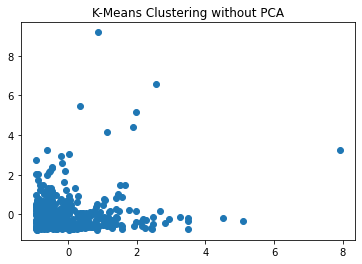

In [105]:
# Visualize the Data and Clusterization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title('K-Means Clustering without PCA')
plt.show()

## 7. Evaluation of K-Means Model on Scaled Data

In [119]:
def calculate_rate(numerator, denominator):
        '''Return the percent value for a statistical formula.'''
        return round(numerator/denominator, 4) * 100

def print_confusion_metrics(cm):
    '''Prints metrics of the model, derived from the confusion matrix.'''
    TN, FP, FN, TP = cm.ravel()

    print('CONFUSION MATRIX METRICS')
    print(f'Hit Rate: {calculate_rate(TP, TP + FN)}%')
    print(f'Selectivity: {calculate_rate(TN, TN + FP)}%')
    print(f'Precision: {calculate_rate(TP, TP + FP)}%')
    print(f'Negative Predictive Value: {calculate_rate(TN, TN + FN)}%')
    print(f'Miss Rate: {calculate_rate(FN, TP + FN)}%')
    print(f'Fall-Out Rate: {calculate_rate(FP, TN + FP)}%')
    print(f'False Discovery Rate: {calculate_rate(FP, TP + FP)}%')
    print(f'False Omission Rate: {calculate_rate(FN, FN + TN)}%')
    print(f'Threat Score: {calculate_rate(TP, TP + FN + FP)}%')
    print(f'Accuracy: {calculate_rate(TP + TN, TP + TN + FP + FN)}%')

def evaluate_model(model, X, y_test):
    '''Report statistics about K-Means instance, using the confusion matrix.'''
    # Evaluate Model
    y_pred = model.predict(X)

    # for computing confusion, scale the predictions to be a list of 1's and 2's
    predictions = [pred + 1 for pred in y_pred]
    cm = confusion_matrix(predictions, y_test)
    print_confusion_metrics(cm)
    
evaluate_model(km, X_scaled, label)

CONFUSION MATRIX METRICS
Hit Rate: 88.68%
Selectivity: 75.44999999999999%
Precision: 33.1%
Negative Predictive Value: 97.99%
Miss Rate: 11.32%
Fall-Out Rate: 24.55%
False Discovery Rate: 66.9%
False Omission Rate: 2.01%
Threat Score: 31.759999999999998%
Accuracy: 77.05%


## 8. K-Means Clustering on PCA Components (n=2 components)